In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.compat import lzip
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
import pickle
import warnings

warnings.filterwarnings('ignore')
set_config(display="diagram")

/root/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# Création d'un modèle de machine learning (régression linéaire) afin de prédire l'espérance de vie

### On récupère et on prévisualize nos datasets

In [2]:
df1 = pd.read_csv('Life Expectancy Data.csv')
df2 = pd.read_csv('Life_Expectancy_00_15.csv')

In [3]:
df1.sample(3)

Country  Year      Status  Life expectancy   Adult Mortality  \
1533   Lithuania  2004   Developed              71.6             24.0   
1419  Kyrgyzstan  2006  Developing              66.7            234.0   
1399      Kuwait  2010  Developing              74.0             86.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1533              0    12.10               76.361877         94.0         1   
1419              4     2.48                0.000000          9.0        27   
1399              1     0.01             2009.575605         99.0        13   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  \
1533  ...    9.0               5.67         94.0        0.1    676.966998   
1419  ...   93.0               6.73         92.0        0.1           NaN   
1399  ...   98.0               2.76         98.0        0.1  38497.616960   

      Population   thinness  1-19 years   thinness 5-9 years  \
1533    337775.0                    3.1                  3.1   
1419         NaN                    3.3                  3.4   
1399         NaN                    3.3                  3.2   

      Income composition of resources  Schooling  
1533                            0.792       16.3  
1419                            0.613       12.5  
1399                            0.790       13.5  

[3 rows x 22 columns]

In [4]:
df2.sample(3)

Country  Year      Continent  Least Developed  Life Expectancy  \
57   Argentina  2009  South America            False        75.116000   
824    Ireland  2008         Europe            False        80.095122   
687      Ghana  2015         Africa            False        62.772000   

     Population  CO2 emissions  Health expenditure  \
57     40482786       3.867570            9.455988   
824     4489544      10.197026            9.109280   
687    27849203       0.566623            4.621715   

     Electric power consumption  Forest area  GDP per capita  \
57                  2772.843291    11.155958    16330.632800   
824                 6218.313404    10.195616    44169.094340   
687                  351.301476    34.633207     5206.028871   

     Individuals using the Internet  Military expenditure  \
57                            34.00              0.886509   
824                           65.34              0.575953   
687                           23.00              0.526514   

     People practicing open defecation  \
57                            1.824743   
824                           0.000000   
687                          18.754720   

     People using at least basic drinking water services  \
57                                           98.235716     
824                                          97.288085     
687                                          80.157961     

     Obesity among adults  Beer consumption per capita  
57                   24.7                      3.23000  
824                  21.0                      6.07408  
687                   9.3                      0.47000

### On merge nos datasets sur les colonnes 'Country' et 'Year' puis on visualize le résultat afin de déterminer leurs différences

In [5]:
df_vis = pd.merge(df1, df2, how='outer', on=['Country','Year'])
df_vis.to_csv('merged_life_expectancy_test.csv')

In [6]:
# Pays de df1 n'ayant de données que pour l'année 2013

df1_2013_only_countries = [
    'Dominica',
    'Cook Islands',
    'Marshall Islands',
    'Monaco',
    'Nauru',
    'Niue',
    'Palau',
    'Saint Kitts and Nevis',
    'San Marino',
    'Tuvalu'
]

In [7]:
# Pays uniquement présents dans df1 (sans compter df1_2013_only_countries qui ne sont pas dans df2 non plus)

df1_only_countries_list = [
    'Afghanistan',
    'Antigua and Barbuda',
    'Azerbaijan',
    'Bahamas',
    'Barbados',
    'Belize',
    'Bhutan',
    'Bosnia and Herzegovina',
    'Burkina Faso',
    'Burundi',
    'Cabo Verde',
    'Central African Republic',
    'Chad',
    'Comoros',
    'Cuba',
    "Democratic People's Republic of Korea",
    'Republic of Korea',
    'Djibouti',
    'Dominican Republic',
    'Equatorial Guinea',
    'Fiji',
    'Gambia',
    'Grenada',
    'Guinea',
    'Guinea-Bissau',
    'Guyana',
    'Haiti',
    'Iceland',
    'Japan',
    'Kiribati',
    "Lao People's Democratic Republic",
    'Lebanon',
    'Lesotho',
    'Liberia',
    'Madagascar',
    'Malawi',
    'Maldives',
    'Mali',
    'Mauritania',
    'Micronesia (Federated States of)',
    'Papua New Guinea',
    'Rwanda',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Samoa',
    'Sao Tome and Principe',
    'Seychelles',
    'Sierra Leone',
    'Singapore',
    'Solomon Islands',
    'Somalia',
    'South Sudan',
    'Suriname',
    'Swaziland',
    'Syrian Arab Republic',
    'Timor-Leste',
    'Tonga',
    'Turkmenistan',
    'Uganda',
    'United Arab Emirates',
    'Uzbekistan',
    'Vanuatu',
    'Viet Nam',
    'Zambia'
]

In [8]:
# Pays dans df1 et df2 mais dont le nom est différent (la clé correspond au nom dans df1 et l'argument au nom dans df2)

country_names = {
    'Bolivia (Plurinational State of)' : 'Bolivia',
    'Congo' : 'Congo Rep.',
    'Democratic Republic of the Congo' : 'Congo Dem. Rep.',
    "Côte d'Ivoire" : "Cote d'Ivoire",
    'Iran (Islamic Republic of)' : 'Iran',
    'Kyrgyzstan' : 'Kyrgyz Republic',
    'Slovakia' : 'Slovak Republic',
    'United Republic of Tanzania' : 'Tanzania',
    'Turkey' : 'Turkiye',
    'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
    'United States of America' : 'United States',
    'Venezuela (Bolivarian Republic of)' : 'Venezuela',
    'The former Yugoslav republic of Macedonia' : 'North Macedonia',
    'Republic of Moldova' : 'Moldova'
}

### On enlève les pays présents uniquement dans df1 et on standardise les noms puis on merge les dataframes résultants

In [9]:
df1_clean = df1.copy()

df1_clean = df1_clean[~df1_clean['Country'].isin(df1_2013_only_countries+df1_only_countries_list)]
df1_clean['Country'] = df1_clean['Country'].apply(lambda name: country_names[name] if name in country_names else name)

In [10]:
df = pd.merge(df1_clean, df2, how='outer', on=['Country','Year'])

In [11]:
df.to_csv('merged_life_expectancy.csv')

### On regarde le taux de remplissage de chaque colonne

In [12]:
(df.count()/df.shape[0]*100).astype(int).to_frame().rename({0 : 'Remplissage (%)'}, axis=1)

Remplissage (%)
Country                                                         100
Year                                                            100
Status                                                          100
Life expectancy                                                 100
Adult Mortality                                                 100
infant deaths                                                   100
Alcohol                                                          93
percentage expenditure                                          100
Hepatitis B                                                      82
Measles                                                         100
 BMI                                                             99
under-five deaths                                               100
Polio                                                            99
Total expenditure                                                93
Diphtheria                                                       99
 HIV/AIDS                                                       100
GDP                                                              85
Population_x                                                     79
 thinness  1-19 years                                            99
 thinness 5-9 years                                              99
Income composition of resources                                  94
Schooling                                                        94
Continent                                                       100
Least Developed                                                 100
Life Expectancy                                                 100
Population_y                                                    100
CO2 emissions                                                   100
Health expenditure                                              100
Electric power consumption                                      100
Forest area                                                     100
GDP per capita                                                  100
Individuals using the Internet                                  100
Military expenditure                                            100
People practicing open defecation                               100
People using at least basic drinking water serv...              100
Obesity among adults                                            100
Beer consumption per capita                                     100

### On compare la distribution des espérances de vie selon df1 et df2

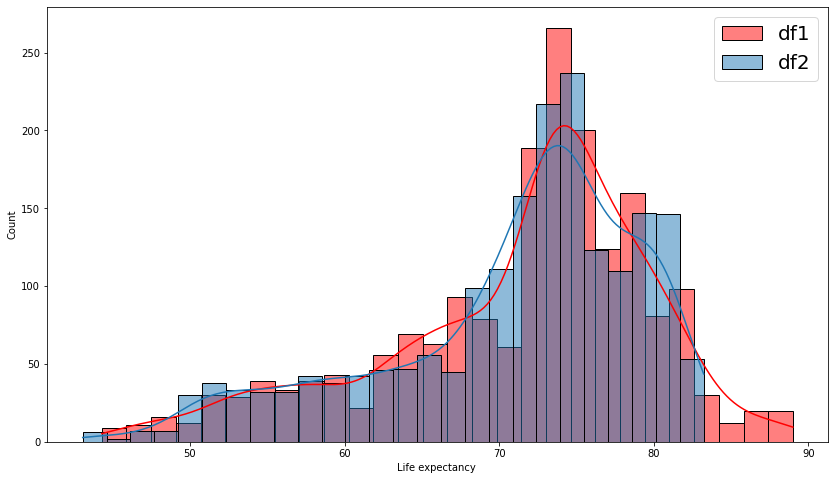

In [13]:
plt.figure(figsize=(14,8))
sns.histplot(df['Life expectancy '], kde=True, color='r', label='df1')
sns.histplot(df['Life Expectancy'], kde=True, label='df2')
plt.legend(fontsize=20);

#### La distribution de l'espérance de vie de df2 semble plus cohérente, c'est donc celle-là que l'on va utiliser.

In [14]:
y = df['Life Expectancy']

### On visualize les corrélations entre chaques colonnes dans une heatmap afin de faire un pré-sélection des potentielles features

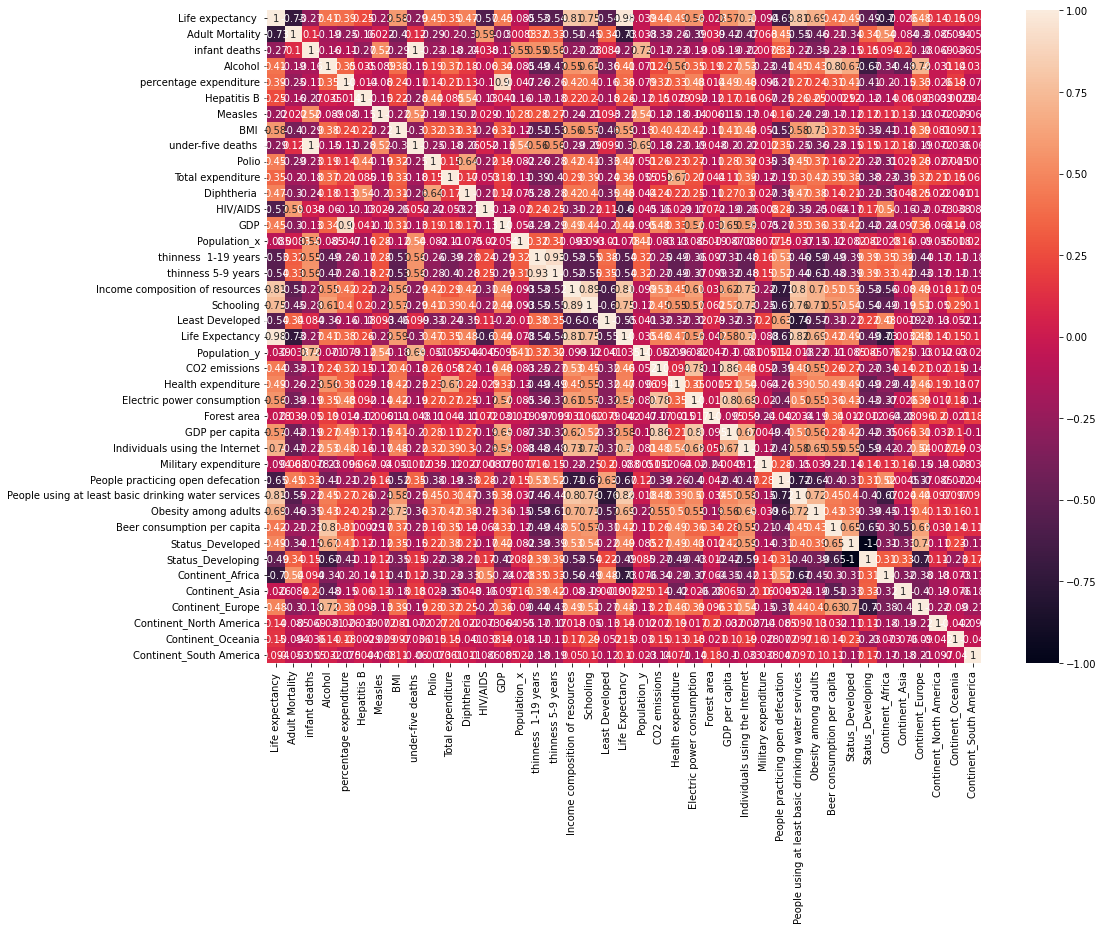

In [15]:
df_hm = pd.get_dummies(df.drop(columns=['Country', 'Year']))
corr = df_hm.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True)
plt.show()

In [16]:
potential_features = [                                      # | Score | Commentaire sur la pertinence     | Gardé |
                                                            # |_______|___________________________________|_______|
    'People using at least basic drinking water services',  # |  0.82 |                                   |  Oui  |
    'Income composition of resources',                      # |  0.81 |                                   |  Oui  |
    'Schooling',                                            # |  0.75 |                                   |  Oui  |
    'Adult Mortality',                                      # | -0.73 | Valeurs aberrantes                |  Non  |
    'Continent_Africa',                                     # | -0.73 | Feature immuable                  |  Non  |
    'Individuals using the Internet',                       # |  0.70 | Corrélation mais pas de causalité |  Non  |
    'Obesity among adults',                                 # |  0.69 | Corrélation mais pas de causalité |  Non  |
    'People practicing open defecation',                    # | -0.67 | Trop spécifique ?                 |   ?   |
    ' HIV/AIDS',                                            # | -0.60 |                                   |  Oui  |
    ' BMI ',                                                # |  0.59 | Corrélation mais pas de causalité |  Non  |
    'GDP per capita',                                       # |  0.58 |                                   |  Oui  |
    'Electric power consumption',                           # |  0.56 | Corrélation mais pas de causalité |  Non  |
    'Least Developed',                                      # | -0.55 | A définir                         |   ?   |
    ' thinness 5-9 years',                                  # | -0.54 |                                   |  Oui  |
    'Status_Developed',                                     # |  0.49 |                                   |  Oui  |
    'Continent_Europe',                                     # |  0.48 | Feature immuable                  |  Non  |
    'Diphtheria ',                                          # |  0.48 |                                   |  Oui  |
    'Health expenditure',                                   # |  0.47 |                                   |  Oui  |
    'Polio',                                                # |  0.47 |                                   |  Oui  |
    'CO2 emissions',                                        # |  0.46 | Corrélation mais pas de causalité |  Non  |
    'GDP',                                                  # |  0.44 |                                   |  Oui  |
    'Beer consumption per capita',                          # |  0.42 | Corrélation mais pas de causalité |  Non  |
    'Alcohol',                                              # |  0.41 | A définir                         |   ?   |
    'percentage expenditure'                                # |  0.38 | A définir                         |   ?   |
                                                            # |_______|___________________________________|_______|
]

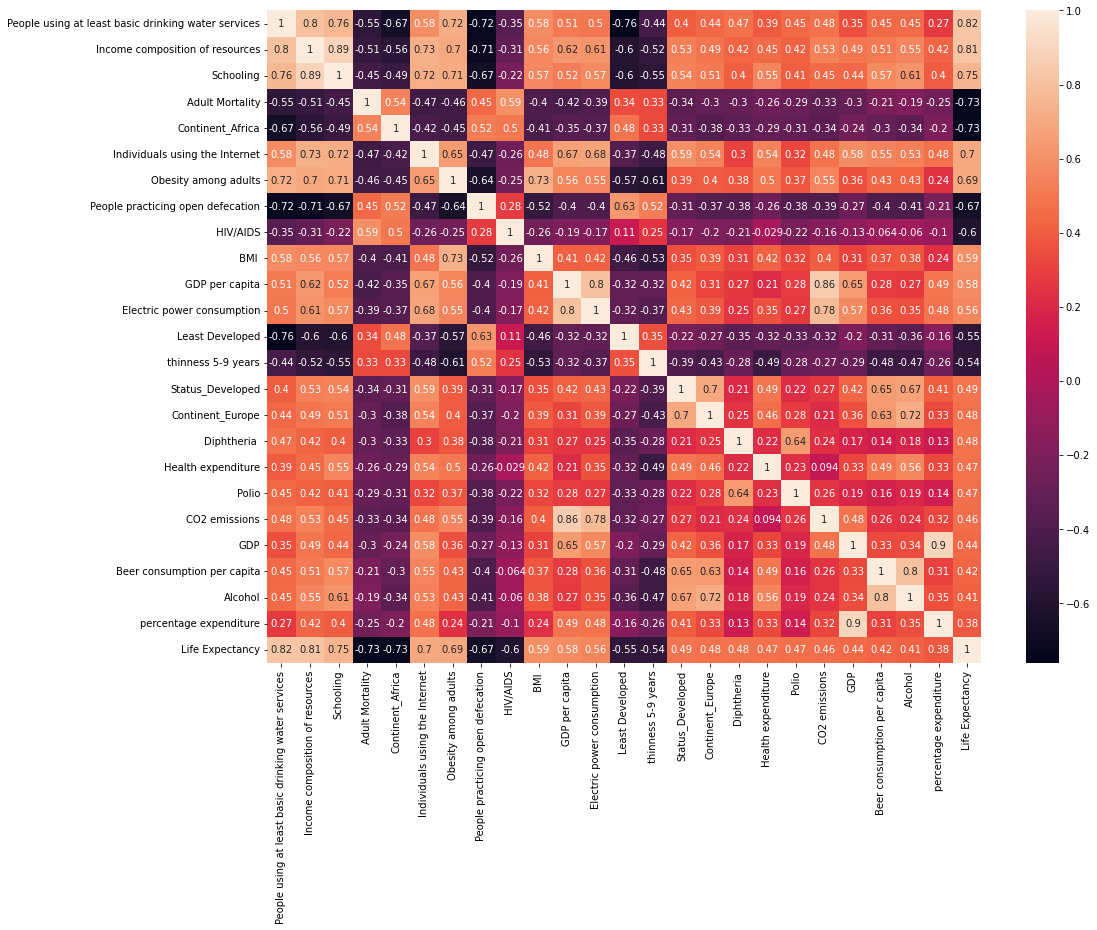

In [17]:
df_clean_hm = pd.get_dummies(df.drop(columns='Country'))[potential_features+['Life Expectancy']]
corr_clean = df_clean_hm.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_clean, annot=True)
plt.show()

### On créé une classe et ses méthodes pour simplifier la création de modèles et le test des features potentielles 

In [18]:
class ModeleLineaire():
    
    def __init__(self, X, y, 
                 num_imputer=SimpleImputer(strategy='median'), 
                 num_transformer=MinMaxScaler(), 
                 cat_transformer=OneHotEncoder(handle_unknown='ignore', drop='first'),
                 test_size=0.3):
              
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size)

        num_cols = X._get_numeric_data().columns.values.tolist()
        cat_cols = list(set(X.columns)-set(X._get_numeric_data().columns))
        
        num_pipeline = Pipeline([
            ('imputer', num_imputer),
            ('scaler', num_transformer)])
        
        self.preprocessor = ColumnTransformer([
            ('num_transformer', num_pipeline, num_cols),
            ('cat_transformer', cat_transformer, cat_cols)])
        
        pipeline = make_pipeline(self.preprocessor, LinearRegression())
        
        self.pipe = pipeline.fit(self.X_train, self.y_train)


    def show_scores(self, cv=5, scoring='r2'):
        for i, r2 in enumerate(cross_val_score(self.pipe, self.X_train, self.y_train, cv=cv, scoring=scoring)):
            print(f'{i+1}. r2 = {round(r2,2)}')
        print('Moyenne des r2 :', round(cross_val_score(self.pipe, self.X_train, self.y_train, cv=cv, scoring=scoring).mean(),2))
        print('Score du test :', round(self.pipe.score(self.X_test, self.y_test),2))
    
    def tts(self): return self.X_train, self.X_test, self.y_train, self.y_test

    def prediction(self, X=0): 
        if type(X) == int: return self.pipe.predict(self.X_test)
        return self.pipe.predict(X)
    
    def residuals(self): return self.prediction() - self.y_test
    
    def het(self): return sms.het_breuschpagan(self.residuals(), self.preprocessor.fit_transform(self.X_test))
    
    def plot(self):
        
        def test_homo():
            names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
            test = self.het()
            p_value = lzip(names, test)[1][1]
            if p_value > 0.05: return f"p-value = {round(p_value,2)} > 0.05 :\nNous ne pouvons pas rejeter l'hypothèse nulle.\nC'est homoscédastique"
            return f"p-value = {round(p_value,2)} <= 0.05 :\nNous pouvons rejeter l'hyptohèse nulle.\nC'est hétéroscédastique"

        def remove_spine(axe):
            axe.spines.right.set_visible(False)
            axe.spines.top.set_visible(False)
        
        residus = self.residuals()
        
        fontdict = {'fontsize': '16',
                    'fontweight': 'bold',
                    'color': "black"}

        fig, ((ax1,ax2),
              (ax3,ax4)) = plt.subplots(figsize=(15, 10),nrows=2, ncols=2)

        ax1.set_title('Condition de normalité des erreurs', fontdict)
        sns.histplot(residus, ax = ax1, kde = True)
        ax1.set_xlabel('Résidus')
        remove_spine(ax1)

        ax2.set_title("Visualisation de l'homoscedasticité", fontdict)
        ax2.scatter(self.y_test, residus, c="red")
        ax2.plot(np.array(range(40,90)),np.zeros(50), c="black")
        ax2.set_xlabel('y observé')
        ax2.set_ylabel('Résidus')
        remove_spine(ax2)

        sentence = test_homo()
        ax2.annotate(sentence,ha='left',fontsize=10,fontstyle='italic', xy=(75, 4),
                     xytext=(65, 9),color='black',fontweight="extra bold", bbox=dict(color="white"),
                     arrowprops=dict(color="#1d2d35",linewidth="2",arrowstyle="->", connectionstyle="angle3"))

        ax3.set_title('QQ plot', fontdict)
        sm.qqplot(residus, line='s', ax= ax3)
        remove_spine(ax3)

        ax4.set_visible(False)

        plt.show()

### On créé un modèle à partir d'une première feature *(People using at least basic drinking water services)*

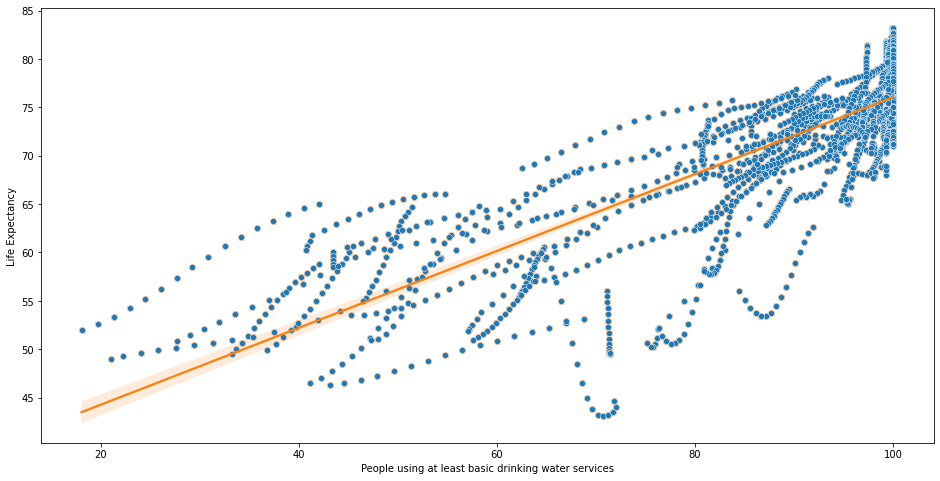

In [19]:
plt.figure(figsize=(16,8))
sns.regplot(df['People using at least basic drinking water services'], y, color='C1')
sns.scatterplot(df['People using at least basic drinking water services'], y);

In [20]:
X1 = df[['People using at least basic drinking water services']]

In [21]:
model1 = ModeleLineaire(X1, y)
model1.show_scores()

1. r2 = 0.73
2. r2 = 0.65
3. r2 = 0.7
4. r2 = 0.63
5. r2 = 0.66
Moyenne des r2 : 0.67
Score du test : 0.68


### On essaie d'améliorer le score obtenu en ajoutant une deuxième feature à notre modèle *(Income composition of resources)*

In [22]:
feature2 = df['Income composition of resources'].apply(lambda x: x if x else np.nan)  # On remplace les 0 par des NaN

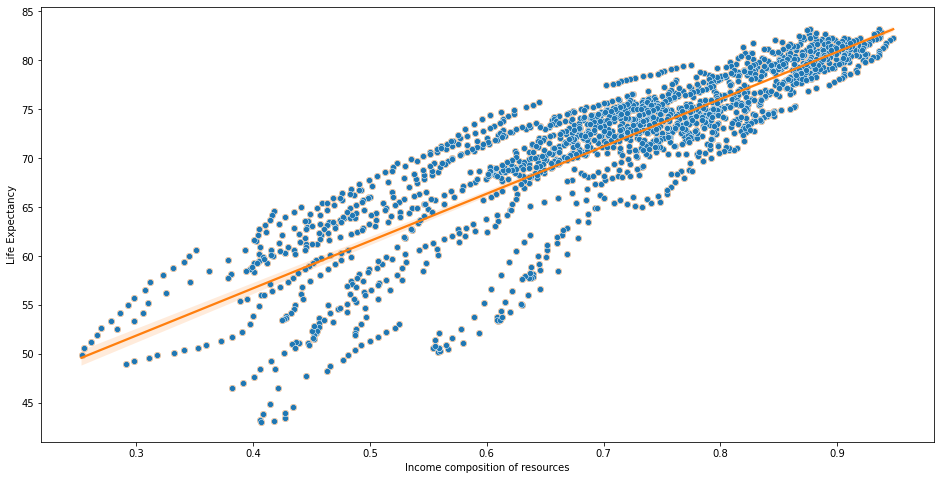

In [23]:
plt.figure(figsize=(16,8))
sns.regplot(feature2, y, color='C1')
sns.scatterplot(feature2, y);

In [24]:
X2 = pd.concat([X1, feature2], axis=1)

In [25]:
model2 = ModeleLineaire(X2, y)
model2.show_scores()

1. r2 = 0.7
2. r2 = 0.71
3. r2 = 0.73
4. r2 = 0.76
5. r2 = 0.76
Moyenne des r2 : 0.73
Score du test : 0.77


#### On observe une amélioration signiticative du score de notre modèle, on peut probablement garder cette feature.

In [26]:
fig = px.scatter_3d(pd.concat([X2, y], axis=1), 
                    x='People using at least basic drinking water services', 
                    y='Income composition of resources', 
                    z='Life Expectancy',
                    color='Life Expectancy',
                    color_continuous_scale=px.colors.diverging.BrBG,
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

### On ajoute une troisième feature à notre modèle *(Schooling)*

In [27]:
feature3 = df['Schooling'].apply(lambda x: x if x else np.nan)  # On remplace les 0 par des NaN

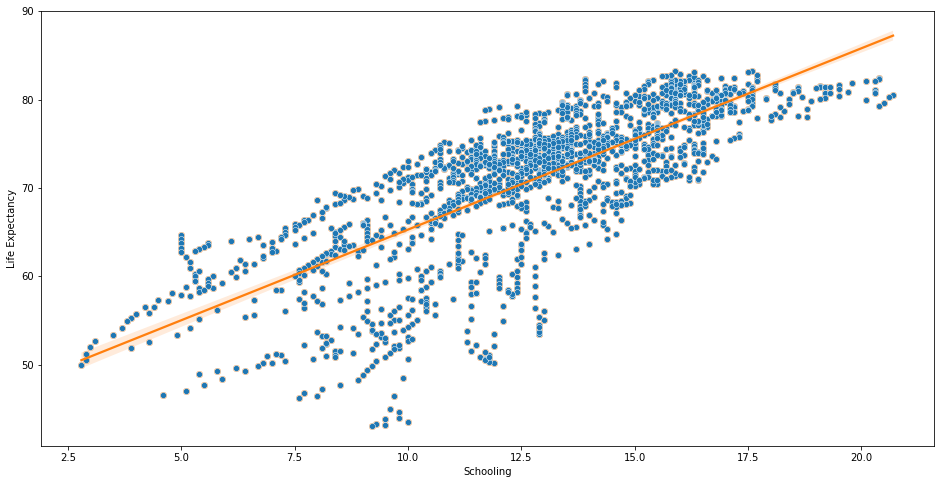

In [28]:
plt.figure(figsize=(16,8))
sns.regplot(feature3, y, color='C1')
sns.scatterplot(feature3, y);

In [29]:
X3 = pd.concat([X2, feature3], axis=1)

In [30]:
model3 = ModeleLineaire(X3, y)
model3.show_scores()

1. r2 = 0.68
2. r2 = 0.73
3. r2 = 0.73
4. r2 = 0.78
5. r2 = 0.77
Moyenne des r2 : 0.74
Score du test : 0.76


#### Pas d'amélioration significative du score du modèle, la feature 'Schooling' est très corrélée aux deux autres, on peut l'enlever de notre modèle.

### On essaie une autre troisième feature *(GDP per capita)*

In [31]:
feature4 = df['GDP per capita'].apply(lambda x: x if x else np.nan)  # On remplace les 0 par des NaN

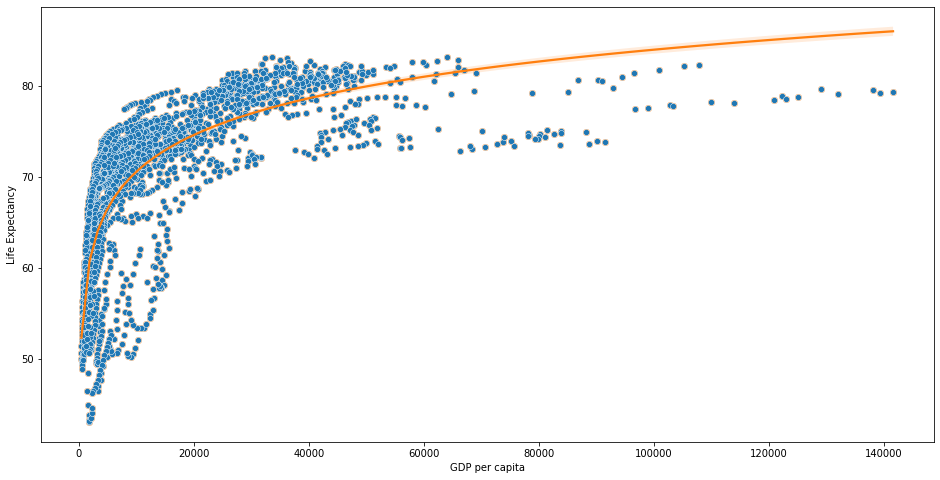

In [32]:
plt.figure(figsize=(16,8))
sns.regplot(feature4, y, color='C1', logx=True)
sns.scatterplot(feature4, y);

In [33]:
X4 = pd.concat([X2, feature4.apply(lambda x: np.log(x))], axis=1)

In [34]:
model4 = ModeleLineaire(X4, y)
model4.show_scores()

1. r2 = 0.74
2. r2 = 0.72
3. r2 = 0.73
4. r2 = 0.73
5. r2 = 0.76
Moyenne des r2 : 0.74
Score du test : 0.77


#### Pas d'amélioration significative du score du modèle, la feature 'GDP per capita' est très corrélée aux deux autres, on peut l'enlever de notre modèle.

### On essaie une autre troisième feature *(HIV/AIDS)*

In [35]:
feature5 = df[' HIV/AIDS'].apply(lambda x: x if x else np.nan)  # On remplace les 0 par des NaN

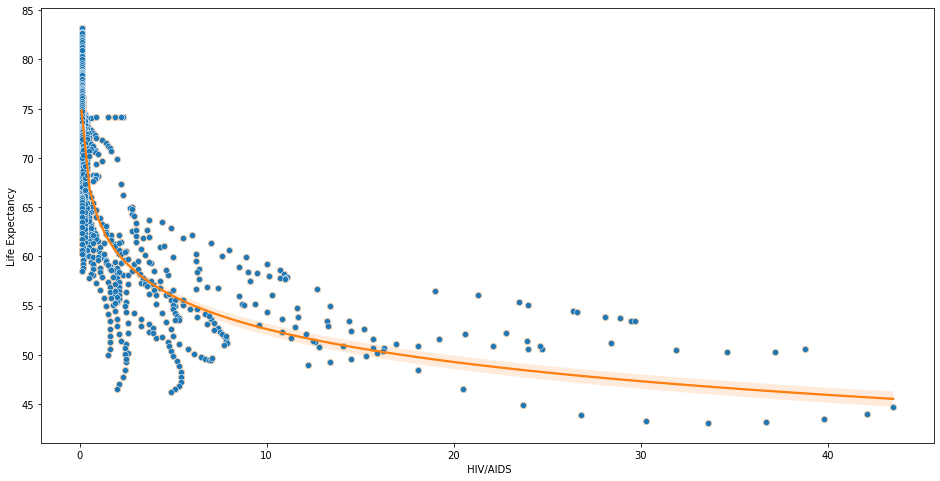

In [36]:
plt.figure(figsize=(16,8))
sns.regplot(feature5, y, color='C1', logx=True)
sns.scatterplot(feature5, y);

In [37]:
X5 = pd.concat([X2, feature5.apply(lambda x: np.log(x))], axis=1).rename({' HIV/AIDS':'HIV/AIDS'}, axis=1)

In [38]:
X5

People using at least basic drinking water services  \
0                                             93.394325     
1                                             93.020056     
2                                             92.631595     
3                                             92.228779     
4                                             91.810887     
...                                                 ...     
1899                                          70.687062     
1900                                          71.211016     
1901                                          71.706071     
1902                                          72.016049     
1903                                          71.869387     

      Income composition of resources  HIV/AIDS  
0                               0.762 -2.302585  
1                               0.761 -2.302585  
2                               0.759 -2.302585  
3                               0.752 -2.302585  
4                               0.738 -2.302585  
...                               ...       ...  
1899                            0.407  3.514526  
1900                            0.418  3.602777  
1901                            0.427  3.683867  
1902                            0.427  3.740048  
1903                            0.434  3.772761  

[1904 rows x 3 columns]

In [39]:
model5 = ModeleLineaire(X5, y)
model5.show_scores()

1. r2 = 0.87
2. r2 = 0.86
3. r2 = 0.88
4. r2 = 0.84
5. r2 = 0.89
Moyenne des r2 : 0.87
Score du test : 0.86


#### On observe une amélioration signiticative du score de notre modèle, on peut probablement garder cette feature.

In [40]:
fig = px.scatter_3d(pd.concat([X5, y], axis=1), 
                    x='People using at least basic drinking water services',
                    y='HIV/AIDS',
                    z='Life Expectancy',
                    color='Income composition of resources', 
                    color_continuous_scale=px.colors.diverging.BrBG,
                    opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### Les autres features potentielles ont été testées et n'améliorent pas le modèle. Le modèle final est donc model5.

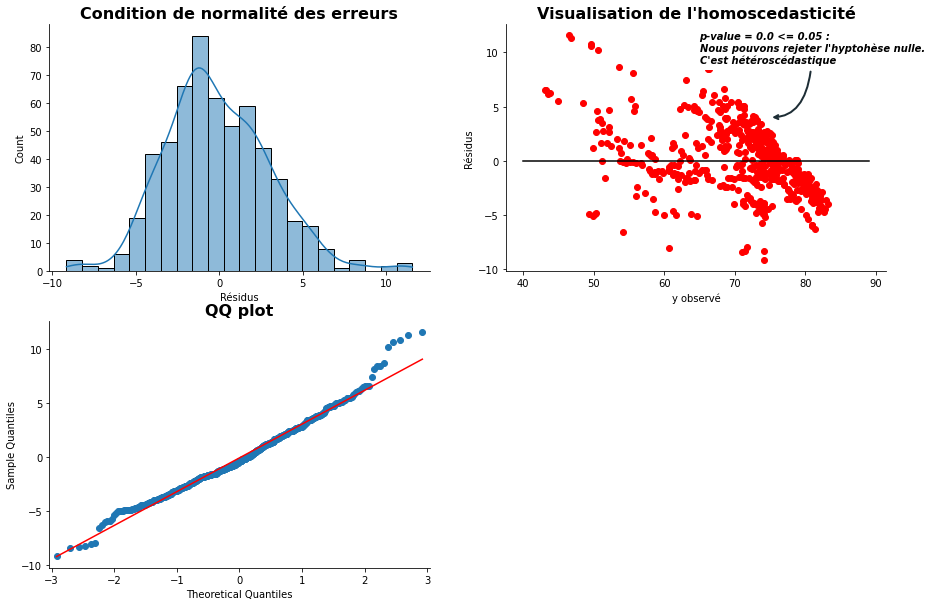

In [41]:
model5.plot()

#### On "pickle" le modèle final afin de pouvoir l'intégrer dans une API

In [42]:
pickle.dump(model5, open('life_expectancy_model.pkl', 'wb'))

In [43]:
from typing import Union
from fastapi import FastAPI
from pandas import DataFrame
from numpy import log
import pickle

app = FastAPI()

class CustomUnpickler(pickle.Unpickler):

    def find_class(self, module, name):
        if name == 'ModeleLineaire':
            from LinearModel import ModeleLineaire
            return ModeleLineaire
        return super().find_class(module, name)

pickled_model = CustomUnpickler(open('life_expectancy_model.pkl', 'rb')).load()


@app.get("/")
def read_root(drink: Union[float, None] = None,
              income: Union[float, None] = None,
              hiv: Union[float, None] = None):

    X = DataFrame({'People using at least basic drinking water services' : [drink],
                   'Income composition of resources' : [income],
                   'HIV/AIDS' : [log(hiv)]})

    pred = pickled_model.prediction(X)[0]

    return {'prediction' : round(pred)}